### Bag of Words

In [458]:
import numpy as np
from sklearn.model_selection import train_test_split

### kmeans.py

[2 0 2 1 0 1 0 2 1 2 1 0 1 0 2 1 1 0 0 2 2 2 0 1 1 0 1 2 2 2 0 1 0 2 1 0 1
 0 1 1 0 1 2 2 1 2 1 2 1 0 1 2 2 2 0 0 2 0 2 1 1 2 2 1 1 2 2 2 1 0 1 0 1 0
 0 0 2 2 2 2 0 1 2 1 2 1 0 2 1 0 1 2 0 1 2 1 0 2 0 2 1 0 0 0 0 1 0 1 1 2 1
 1 2 1 1 2 1 0 1 0 0 0 1 1 2 2 2 1 1 1 2 2 2 2 2 2 0 0 1 2 1 0 1 0 1 0 1 0
 1 0 0 0 2 0 2 1 0 1 2 2 1 1 1 1 2 2 0 2 2 1 0 2 0 1 1 0 1 0 1 2 2 1 1 0 1
 2 2 1 2 1 2 2 1 1 0 2 1 0 1 0 1 0 2 0 2 2 2 1 2 2 0 0 0 0 2 0 0 1 0 2 2 1
 2 0 1 0 0 1 2 0 0 2 1 1 2 0 1 2 2 1 1 1 0 0 2 2 1 0 0 2 1 0 0 2 0 0 2 0 1
 2 2 0 2 0 1 2 2 2 0 1 1 2 1 0 1 1 0 1 1 0 2 2 2 2 1 1 2 1 1 1 2 1 0 1 1 1
 2 2 0 2 2 2 2 0 2 1 2 0 0 1 1 0 0 2 0 2 1 2 2 0 2 1 0 1 0 2 2 2 0 1 0 1 0
 0 1 0 0 2 0 1 1 0 2 1 0 1 1 0 0 0 2 1 1 2 2 1 1 1 0 2 2 0 0 2 2 1 1 2 2 1
 2 0 2 0 2 2 1 2 2 0 1 1 0 2 0 1 0 1 0 2 0 0 2 2 0 1 1 2 1 1 1 2 2 1 0 0 0
 0 2 1 1 2 1 0 2 0 0 1 2 0 0 0 2 1 0 1 2 0 2 1 2 0 2 0 0 0 1 0 2 0 2 1 1 1
 2 2 0 2 2 0 0 1 1 1 0 2 0 1 1 1 0 0 0 2 1 2 1 0 2 1 1 2 2 2 0 2 2 2 0 0 0
 0 0 1 0 0 2 0 0 2 2 1 0 

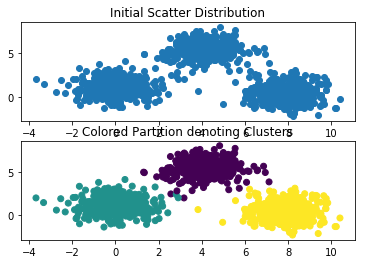

In [459]:
"""
Using SKLearns API for performing Kmeans clustering.
Using sklearn.datasets.make_blobs for generating randomized gaussians
for clustering.

"""

import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs 

# create a dataset sample space that will be used
# to test KMeans. Use function : make_blobs
# 

n_samples = 1000
n_features = 5;
n_clusters = 3;

# aint this sweet 
X, y = make_blobs(n_samples, n_features) 
# X => array of shape [nsamples,nfeatures] ;;; y => array of shape[nsamples]

# X : generated samples, y : integer labels for cluster membership of each sample
# 
# 

# performing KMeans clustering

ret =  KMeans(n_clusters = n_clusters).fit_predict(X)
print(ret)

__, ax = plt.subplots(2)
ax[0].scatter(X[:,0], X[:,1])
ax[0].set_title("Initial Scatter Distribution")
ax[1].scatter(X[:,0], X[:,1], c=ret)
ax[1].set_title("Colored Partition denoting Clusters")
# plt.scatter
plt.show()



### Bag.py

In [460]:
import cv2
import numpy as np 
from glob import glob 
import argparse
#from helpers import *
from matplotlib import pyplot as plt 


class BOV:
    def __init__(self, no_clusters):
        self.no_clusters = no_clusters
        self.train_path = None
        self.test_path = None
        self.im_helper = ImageHelpers()
        self.bov_helper = BOVHelpers(no_clusters)
        self.file_helper = FileHelpers()
        self.imageCount = 0
        self.trainImageCount = 0
        self.train_labels = np.array([])
        self.name_dict = {}
        self.descriptor_list = []
        
        self.path = None
        self.gray = 0
        
        self.train_images = []
        self.train_img_names = []
        self.train_cls = []
        
        self.test_images = []
        self.test_img_names = []
        self.test_cls = []      

        
    def dictionaryfy(self):
        train_dict = {}
        for i, image in enumerate(self.train_images):        
            cls = str(self.train_cls[i]).split('_')[0]
            if (cls not in train_dict):
                train_dict[cls] = []

            train_dict[cls].append(image)
        self.images = train_dict
        
        test_dict = {}
        for i, image in enumerate(self.test_images):        
            cls = str(self.test_cls[i]).split('_')[0]
            if (cls not in test_dict):
                test_dict[cls] = []

            test_dict[cls].append(image)
        self.testImages = test_dict
        
    
    def extractFeatures(self):
        # extract SIFT Features from each image
        print("train image count: ", self.trainImageCount)
        print(self.path)
        l=next(os.walk(self.path))[1]
        label_count=0
        for word in l:
            self.name_dict[word]=label_count
            label_count=label_count+1
            
        for word, imlist in self.images.items():
            #self.name_dict[str(label_count)] = word
            print("Computing Features for ", word)
            #print("List: ", imlist)
            for im in imlist:
                # cv2.imshow("im", im)
                # cv2.waitKey()
                self.train_labels = np.append(self.train_labels, self.name_dict[word])
                #plt.figure()
                #plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
                
                kp, des = self.im_helper.features(im) #self.im_helper.gray(im)
                #featureV = self.im_helper.featuresPL(im)
                #print("featureV: ", featureV)
                #print("des: ", des)
                
                
                
                self.descriptor_list.append(des)

            label_count += 1
            
        #print(self.descriptor_list)
 
    def trainModel(self):
        """
        This method contains the entire module 
        required for training the bag of visual words model

        Use of helper functions will be extensive.

        """
        # perform clustering   
        bov_descriptor_stack = self.bov_helper.formatND(self.descriptor_list)
        print("Cluster")
        self.bov_helper.cluster()
        self.bov_helper.developVocabulary(n_images = self.trainImageCount, descriptor_list=self.descriptor_list)

        # show vocabulary trained
        self.bov_helper.plotHist()
 

        self.bov_helper.standardize()
        self.runCrossval()
        print("trainModel DONE.")

    def runCrossval(self):
        self.bov_helper.train(self.train_labels)
        
    def recognize(self,test_img, test_image_path=None):

        """ 
        This method recognizes a single image 
        It can be utilized individually as well.

        """

        kp, des = self.im_helper.features(test_img)
        #des = self.im_helper.featuresPL(im)
        # print kp
        #print(des.shape)

        # generate vocab for test image
        vocab = np.array( [[ 0 for i in range(self.no_clusters)]])
        # locate nearest clusters for each of 
        # the visual word (feature) present in the image
        
        # test_ret =<> return of kmeans nearest clusters for N features
        test_ret = self.bov_helper.kmeans_obj.predict(des)
        # print test_ret

        # print vocab
        for each in test_ret:
            vocab[0][each] += 1

        #print(vocab)
        # Scale the features
        vocab = self.bov_helper.scale.transform(vocab)

        # predict the class of the image
        lb = self.bov_helper.clf.predict(vocab)
        # print "Image belongs to class : ", self.name_dict[str(int(lb[0]))]
        return lb


    def getHistogramLabels(self):
        return self.bov_helper.getHistogramLabels()
        
    def testModel(self):
        """ 
        This method is to test the trained classifier

        read all images from testing path 
        use BOVHelpers.predict() function to obtain classes of each image

        """
        wordlist=[]
        #self.testImages, self.testImageCount = self.file_helper.getFiles(self.test_path)
        
        predictions = []
        actual_labels=[] 
        #self.testImages.sort()
        #correct_labels = []
        for word, imlist in self.testImages.items():
            print("processing " ,word)
            for im in imlist:
                actual_labels.append(self.name_dict[word])
                # print imlist[0].shape, imlist[1].shape
                #correct_labels.append(self.name_dict_reverse[word])
                #print(im.shape)
                cl = self.recognize(im)
                #print(cl)
                predictions.append({
                    'image':im,
                    'class':cl
                    #'object_name':self.name_dict[str(int(cl[0]))]
                    })

        #print(predictions)
        #print("CORRECT LABELS:",correct_labels)
        predicted_labels=[]
        for cl in predictions:
            predicted_labels.append(int(cl['class'][0]))
        
        
        #for cl in self.test_cls:
            #actual_labels.append(self.name_dict[cl])
        print("PREDICTED: ",predicted_labels)
        print("ACTUAL: ",actual_labels)
        
        prec=precision_score(actual_labels, predicted_labels,average='macro')
        acc=accuracy_score(actual_labels, predicted_labels)
        f1=f1_score(actual_labels, predicted_labels,average='macro')
        #for each in predictions:
            # cv2.imshow(each['object_name'], each['image'])
            # cv2.waitKey()
            # cv2.destroyWindow(each['object_name'])
            # 
            #plt.imshow(cv2.cvtColor(each['image'], cv2.COLOR_GRAY2RGB))
            #plt.title(each['object_name'])
            #plt.show()
        return [prec,acc,f1]


    def print_vars(self):
        pass
    
    def loadFruits(self, path):
        self.path = path
        
        # read file. prepare file lists.
        self.train_images, self.train_img_names = self.file_helper.get_fruit_images(self.path)
        self.train_cls = [name.split('_')[0] for name in self.train_img_names]
        
        # train the model
        #self.trainModel()
        # test model
        #self.testModel()
    
    def trainTestSplit(self):
        self.train_images, self.test_images, self.train_cls, self.test_cls = train_test_split(self.train_images, self.train_cls, test_size=0.2, random_state=9253, stratify=self.train_cls)
        self.trainImageCount = len(self.train_images)
        self.testImageCount = len(self.test_images)
    
    def loadCars(self, path):
        self.path = path
        
        self.train_images, self.train_img_names = self.file_helper.get_car_images(self.path)
        self.train_cls = [0 if name.startswith('neg') else 1 for name in self.train_img_names]
        self.trainImageCount = len(self.train_images)
        
        
        self.test_images, self.test_img_names = self.file_helper.get_car_images(self.path, 'TestImages')
        self.test_cls = [0 if name.startswith('neg') else 1 for name in self.test_img_names]
        self.testImageCount = len(self.test_images)
        
        # set testing paths
        #self.test_path = test_path
        # train the model
        #self.trainModel()
        # test model
        #self.testModel()    

# if __name__ == '__main__':

#     # parse cmd args
#     parser = argparse.ArgumentParser(
#             description=" Bag of visual words example"
#         )
#     parser.add_argument('--train_path', action="store", dest="train_path", required=True)
#     parser.add_argument('--test_path', action="store", dest="test_path", required=True)

#     args =  vars(parser.parse_args())
#     print(args)

    
#     bov = BOV(no_clusters=100)

#     # set training paths
#     bov.train_path = args['train_path'] 
#     # set testing paths
#     bov.test_path = args['test_path'] 
#     # train the model
#     bov.trainModel()
#     # test model
#     bov.testModel()


### helper.py

In [461]:
import numpy as np 

from PIL import Image
import cv2

import requests
import zipfile
import tarfile
import io

import os
import glob

import gc

from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier

class ImageHelpers:
    def __init__(self):
        self.sift_object = cv2.xfeatures2d.SIFT_create()

    def gray(self, image):
        plt.figure()
        plt.imshow(image)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return gray

    def colorRGB(self, image):
        colorRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return colorRGB
    
    def features(self, image):
        keypoints, descriptors = self.sift_object.detectAndCompute(image, None)
        return [keypoints, descriptors]
    
    def featuresPL(self, image):
        im = Image.fromarray(image)
        featureVector = im.histogram()
        return featureVector


class BOVHelpers:
    def __init__(self, n_clusters = 20):
        self.n_clusters = n_clusters
        self.kmeans_obj = KMeans(n_clusters = n_clusters)
        self.kmeans_ret = None
        self.descriptor_vstack = None
        self.mega_histogram = None
        self.train_labels = None
        self.clf  = MLPClassifier(solver='lbfgs', alpha=0.001,hidden_layer_sizes=(100,), random_state=1)  
    def getHistogramLabels(self):
        return [self.mega_histogram,self.train_labels]
    
    def cluster(self):
        """    
        cluster using KMeans algorithm, 

        """
        self.kmeans_ret = self.kmeans_obj.fit_predict(self.descriptor_vstack)

    def developVocabulary(self,n_images, descriptor_list, kmeans_ret = None):
        
        """
        Each cluster denotes a particular visual word 
        Every image can be represeted as a combination of multiple 
        visual words. The best method is to generate a sparse histogram
        that contains the frequency of occurence of each visual word 

        Thus the vocabulary comprises of a set of histograms of encompassing
        all descriptions for all images

        """

        self.mega_histogram = np.array([np.zeros(self.n_clusters) for i in range(n_images)])
        old_count = 0
        print("n_images:",n_images)
        print("descriptor_list length:", len(descriptor_list))
        
        for i in range(n_images):
            #print(i)
            l = len(descriptor_list[i])
            for j in range(l): 
                #print(i, j)
                if kmeans_ret is None:
                    #if (old_count+j==n_images):
                    #    print(old_count+j)
                    #    break;
                    #else: 
                    idx = self.kmeans_ret[old_count+j]
                else:
                    idx = kmeans_ret[old_count+j]
                #print("why are we still here")
                self.mega_histogram[i][idx] += 1
            old_count += l
        print("Vocabulary Histogram Generated")

    def standardize(self, std=None):
        """
        
        standardize is required to normalize the distribution
        wrt sample size and features. If not normalized, the classifier may become
        biased due to steep variances.

        """
        if std is None:
            self.scale = StandardScaler().fit(self.mega_histogram)
            self.mega_histogram = self.scale.transform(self.mega_histogram)
        else:
            print("STD not none. External STD supplied")
            self.mega_histogram = std.transform(self.mega_histogram)

    def formatND(self, l):
        """    
        restructures list into vstack array of shape
        M samples x N features for sklearn

        """
        #print("l: ")
        #print(l)
        
        vStack = np.array(l[0])
        for remaining in l[1:]:
            vStack = np.vstack((vStack, remaining))
        self.descriptor_vstack = vStack.copy()
        return vStack

    def train(self, train_labels):
        """
        uses sklearn.svm.SVC classifier (SVM) 


        """
        #print("Training SVM")
        #print(self.clf)
        #print("Train labels", train_labels)
        #self.clf.fit(self.mega_histogram, train_labels)
        self.train_labels=train_labels
        self.clf.fit(self.mega_histogram, train_labels)
        names = ["Nearest Centroid", "Linear SVM","Decision Tree", "Naive Bayes","MLP"]
        classifiers = [NearestCentroid(metric="euclidean"),LinearSVC(dual=False),DecisionTreeClassifier(),GaussianNB(),MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)]
        
        for name, clf in zip(names, classifiers):
            scoring = {'acc': 'accuracy','prec': 'precision_macro','rec': 'recall_macro'}
            scores = cross_validate(clf, self.mega_histogram, train_labels, cv=5, scoring=scoring,return_train_score=True)
            print(name," -- Training Set --", "Mean Accuracy", scores['train_acc'].mean())
            print(name," -- Test Set --", "Mean Accuracy", scores['test_acc'].mean())
            print(name," -- Training Set --", "Mean Precision", scores['train_prec'].mean())
            print(name," -- Test Set --", "Mean Precision", scores['test_prec'].mean())
            print(name," -- Training Set --", "Mean Recall", scores['train_rec'].mean())
            print(name," -- Test Set --", "Mean Recall", scores['test_rec'].mean())
        print("Training completed")

    def predict(self, iplist):
        predictions = self.clf.predict(iplist)
        return predictions

    def plotHist(self, vocabulary = None):
        print("Plotting histogram")
        if vocabulary is None:
            vocabulary = self.mega_histogram

        x_scalar = np.arange(self.n_clusters)
        y_scalar = np.array([abs(np.sum(vocabulary[:,h], dtype=np.int32)) for h in range(self.n_clusters)])

        print(y_scalar)

        plt.bar(x_scalar, y_scalar)
        plt.xlabel("Visual Word Index")
        plt.ylabel("Frequency")
        plt.title("Complete Vocabulary Generated")
        plt.xticks(x_scalar + 0.4, x_scalar)
        plt.show()

class FileHelpers:

    def __init__(self):
        pass
    
    def resize_images(self,images):
        """
        used to resize all images to the mean height/width
        note that this is prone to generating distorted images
        better results are expected with methods like pyramid pooling (https://arxiv.org/abs/1406.4729)
        """
        target_size = 200
        mean_shape = np.mean([[i.shape[0],i.shape[1]] for i in images], axis=0)
        max_v = max(mean_shape[0], mean_shape[1])
        # scale by preserving average ratio
        target_height = int(target_size * mean_shape[0]/max_v)
        target_width = int(target_size * mean_shape[1]/max_v)
        for i in range(len(images)):
            images[i] = np.array(Image.fromarray(images[i]).resize((target_width, target_height), Image.ANTIALIAS))
            print("Resized {} fruit images".format(i), end="\r")

        return images
    
    def get_car_images(self, car_data_path, folder = 'TrainImages'):
        print(car_data_path, folder)
        p = os.path.join(car_data_path,folder,'*.pgm')
        files = glob.glob(p)
        print("Found {} car files".format(len(files)))
        images = []
        image_names = []

        for filename in files:
            image_names.append(os.path.basename(filename))
            with Image.open(filename) as img:
                images.append(np.array(img))

        return np.array(images), image_names

    def get_fruit_images(self, fruits_data_path):
        images = []
        image_names = []
        cnt=0

        for dirpath, dirnames, filenames in os.walk(fruits_data_path):
            for filename in [f for f in filenames if f.endswith(".jpg")]:
                cnt = cnt+1
                with Image.open(os.path.join(dirpath,filename)) as img:
                    if img.format != "JPEG":
                        # we only want 3 channels
                        img = img.convert("RGB")
                    np_img = np.array(img)
                    if len(np_img.shape) != 3 or np_img.shape[2] != 3:
                        # incorrectly imported/converted RGB file
                        continue
                    images.append(np_img)
                    image_names.append(os.path.split(dirpath)[-1] + "_" + filename)
                    print("Found {} fruit files".format(len(image_names)), end="\r")
        
        
        images = np.stack(self.resize_images(images), axis=0)

        return images, image_names
    
    def getFiles(self, path):
        """
        - returns  a dictionary of all files 
        having key => value as  objectname => image path

        - returns total number of files.

        """
        imlist = {}
        count = 0
        for each in glob(path + "*"):
            each = each.replace("\\", "/")
            word = each.split("/")[-1]
            print(" #### Reading image category ", word, " ##### ")
            imlist[word] = []
            for imagefile in glob(path+word+"/*"):
                imagefile = imagefile.replace("\\", "/")
                print("Reading file ", imagefile)
                
                
                im = Image.open(imagefile)
                if (im.format != "JPEG"):
                    im = im.convert("RGB")
                np_im = np.array(im)
                if len(np_im.shape) != 3 or np_im.shape[2] != 3:
                    # incorrectly imported/converted RGB file
                    continue
                
                #im = cv2.imread(imagefile,1)
                
                #plt.imshow(im)
                imlist[word].append(np_im)
                count +=1 

        return [imlist, count]



### Load images

In [462]:
cars = BOV(no_clusters=100)
cars.loadCars("../../../ex3/CarData/")
fruits = BOV(no_clusters=100)
fruits.loadFruits("../../ex3/FIDS30/")

../../../ex3/CarData/ TrainImages
Found 0 car files
../../../ex3/CarData/ TestImages
Found 0 car files


Text(0.5, 1.0, 'Colour Histogram, using PIL')

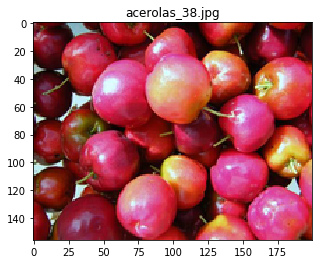

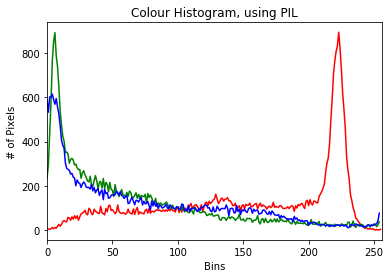

In [463]:
im = Image.fromarray(fruits.train_images[0])
plt.imshow(im)
plt.title(fruits.train_img_names[0])

featureVector = im.histogram()

plt.figure()
plt.plot(featureVector[:256], 'r')
plt.plot(featureVector[257:512], 'g')
plt.plot(featureVector[513:], 'b')
plt.xlim([0, 256])
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.title("Colour Histogram, using PIL")

### Train/test split

In [464]:
print("{} unique classes for cars".format(len(set(cars.train_cls))))
print("{} unique classes for fruits".format(len(set(fruits.train_cls))))

fruits.trainTestSplit()

0 unique classes for cars
30 unique classes for fruits


Text(0.5, 1.0, 'watermelons')

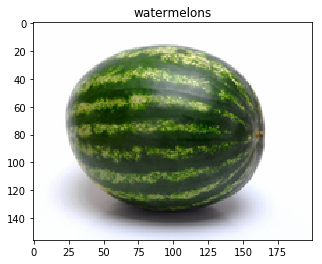

In [465]:
cars.dictionaryfy()
fruits.dictionaryfy()
im = Image.fromarray(fruits.images['watermelons'][0])
plt.imshow(im)
plt.title('watermelons')

In [466]:
#%time cars.extractFeatures()
#cars.testModel()

In [467]:
l=next(os.walk("../../ex3/fruits_small/"))[1]
l

['acerolas',
 'apples',
 'apricots',
 'avocados',
 'bananas',
 'blackberries',
 'blueberries',
 'cantaloupes',
 'cherries',
 'coconuts',
 'figs',
 'grapefruits',
 'grapes',
 'guava',
 'kiwifruit',
 'lemons',
 'limes',
 'mangos',
 'olives',
 'oranges',
 'passionfruit',
 'peaches',
 'pears',
 'pineapples',
 'plums',
 'pomegranates',
 'raspberries',
 'strawberries',
 'tomatoes',
 'watermelons']

In [468]:
#%time cars.trainModel()
# perform clustering   
#%time bov_descriptor_stack = cars.bov_helper.formatND(cars.descriptor_list)
#%time cars.bov_helper.cluster()
#%time cars.bov_helper.developVocabulary(n_images = cars.trainImageCount, descriptor_list=cars.descriptor_list)

# show vocabulary trained
#%time cars.bov_helper.plotHist()


#%time cars.bov_helper.standardize()
#%time cars.bov_helper.train(cars.train_labels)
#print("trainModel DONE.")


In [469]:
for i,l in enumerate(cars.descriptor_list):
    print(i)
    if (l is None):
        print(i)
        print(l)

In [470]:
%time fruits.extractFeatures()

train image count:  151
../../ex3/fruits_small/
Computing Features for  guava
Computing Features for  acerolas
Computing Features for  strawberries
Computing Features for  figs
Computing Features for  tomatoes
Computing Features for  watermelons
Computing Features for  olives
Computing Features for  apricots
Computing Features for  passionfruit
Computing Features for  kiwifruit
Computing Features for  blackberries
Computing Features for  pomegranates
Computing Features for  lemons
Computing Features for  oranges
Computing Features for  grapefruits
Computing Features for  plums
Computing Features for  apples
Computing Features for  pears
Computing Features for  pineapples
Computing Features for  cantaloupes
Computing Features for  limes
Computing Features for  peaches
Computing Features for  cherries
Computing Features for  coconuts
Computing Features for  mangos
Computing Features for  raspberries
Computing Features for  grapes
Computing Features for  bananas
Computing Features for  av

Cluster
n_images: 151
descriptor_list length: 151
Vocabulary Histogram Generated
Plotting histogram
[259 424 340 259 301 517 595 309 405 279 251 296 265 286 227 266 308 220
 217 368 290 301 357 274 298 295 335 521 325 222 301 289 329 318 253 292
 293 285 292 343 368 312 232 293 270 281 226 332 255 270 300 308 261 446
 242 286 478 282 216 423 356 249 267 267 256 268 259 326 335 347 277 333
 272 217 290 331 416 247 351 259 349 246 242 204 295 256 210 300 252 264
 356 319 311 271 277 262 282 297 255 375]


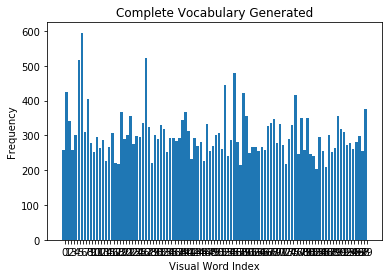

D:\Programme\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anacon

Nearest Centroid  -- Training Set -- Mean Accuracy 0.7476812013649138
Nearest Centroid  -- Test Set -- Mean Accuracy 0.24715492840492842
Nearest Centroid  -- Training Set -- Mean Precision 0.8215050505050506
Nearest Centroid  -- Test Set -- Mean Precision 0.1810960591133005
Nearest Centroid  -- Training Set -- Mean Recall 0.7562222222222224
Nearest Centroid  -- Test Set -- Mean Recall 0.24137931034482757


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Linear SVM  -- Training Set -- Mean Accuracy 1.0
Linear SVM  -- Test Set -- Mean Accuracy 0.19857267732267733
Linear SVM  -- Training Set -- Mean Precision 1.0
Linear SVM  -- Test Set -- Mean Precision 0.14652490421455938
Linear SVM  -- Training Set -- Mean Recall 1.0
Linear SVM  -- Test Set -- Mean Recall 0.20448275862068965
Decision Tree  -- Training Set -- Mean Accuracy 1.0
Decision Tree  -- Test Set -- Mean Accuracy 0.15590576090576094
Decision Tree  -- Training Set -- Mean Precision 1.0
Decision Tree  -- Test Set -- Mean Precision 0.09818007662835249
Decision Tree  -- Training Set -- Mean Recall 1.0
Decision Tree  -- Test Set -- Mean Recall 0.14283819628647215
Naive Bayes  -- Training Set -- Mean Accuracy 0.942631199008576
Naive Bayes  -- Test Set -- Mean Accuracy 0.08548035298035299
Naive Bayes  -- Training Set -- Mean Precision 0.9576349206349206
Naive Bayes  -- Test Set -- Mean Precision 0.03252990568207959
Naive Bayes  -- Training Set -- Mean Recall 0.9443333333333334
Naive Ba

D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1

In [471]:
%time fruits.trainModel()

In [472]:
#%time fruits.runCrossval()
histogramLabels = fruits.getHistogramLabels()
names = ["Nearest Centroid", "Linear SVM","Decision Tree", "Naive Bayes","MLP"]
classifiers = [NearestCentroid(metric="euclidean"),LinearSVC(dual=False),DecisionTreeClassifier(),GaussianNB(),MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)]
        
for name, clf in zip(names, classifiers):
    scoring = {'acc': 'accuracy','prec': 'precision_macro','rec': 'recall_macro'}
    scores = cross_validate(clf, histogramLabels[0], histogramLabels[1], cv=5, scoring=scoring,return_train_score=True)
    print(name," -- Training Set --", "Mean Accuracy", scores['train_acc'].mean())
    print(name," -- Test Set --", "Mean Accuracy", scores['test_acc'].mean())
    print(name," -- Training Set --", "Mean Precision", scores['train_prec'].mean())
    print(name," -- Test Set --", "Mean Precision", scores['test_prec'].mean())
    print(name," -- Training Set --", "Mean Recall", scores['train_rec'].mean())
    print(name," -- Test Set --", "Mean Recall", scores['test_rec'].mean())
print("Training completed")

D:\Programme\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anacon

Nearest Centroid  -- Training Set -- Mean Accuracy 0.7476812013649138
Nearest Centroid  -- Test Set -- Mean Accuracy 0.24715492840492842
Nearest Centroid  -- Training Set -- Mean Precision 0.8215050505050506
Nearest Centroid  -- Test Set -- Mean Precision 0.1810960591133005
Nearest Centroid  -- Training Set -- Mean Recall 0.7562222222222224
Nearest Centroid  -- Test Set -- Mean Recall 0.24137931034482757


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Linear SVM  -- Training Set -- Mean Accuracy 1.0
Linear SVM  -- Test Set -- Mean Accuracy 0.19857267732267733
Linear SVM  -- Training Set -- Mean Precision 1.0
Linear SVM  -- Test Set -- Mean Precision 0.14652490421455938
Linear SVM  -- Training Set -- Mean Recall 1.0
Linear SVM  -- Test Set -- Mean Recall 0.20448275862068965
Decision Tree  -- Training Set -- Mean Accuracy 1.0
Decision Tree  -- Test Set -- Mean Accuracy 0.1518327505827506
Decision Tree  -- Training Set -- Mean Precision 1.0
Decision Tree  -- Test Set -- Mean Precision 0.09414285714285713
Decision Tree  -- Training Set -- Mean Recall 1.0
Decision Tree  -- Test Set -- Mean Recall 0.1433333333333333
Naive Bayes  -- Training Set -- Mean Accuracy 0.942631199008576
Naive Bayes  -- Test Set -- Mean Accuracy 0.08548035298035299
Naive Bayes  -- Training Set -- Mean Precision 0.9576349206349206
Naive Bayes  -- Test Set -- Mean Precision 0.03252990568207959
Naive Bayes  -- Training Set -- Mean Recall 0.9443333333333334
Naive Baye

D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

MLP  -- Training Set -- Mean Accuracy 0.22948375824690354
MLP  -- Test Set -- Mean Accuracy 0.11822052947052945
MLP  -- Training Set -- Mean Precision 0.13914189062903434
MLP  -- Test Set -- Mean Precision 0.048801542025226234
MLP  -- Training Set -- Mean Recall 0.19255555555555554
MLP  -- Test Set -- Mean Recall 0.10536796536796537
Training completed


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


D:\Programme\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum nu

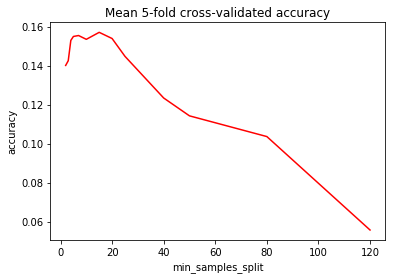

In [473]:
min_samples_splits = [2,3,4,5,7,10,15,20,25,40,50,80,120]
results = []
for min_samples_split in min_samples_splits:
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores = cross_validate(clf, histogramLabels[0], histogramLabels[1], cv=5)
    results.append(scores['test_score'].mean())
    
plt.plot(min_samples_splits, results, "r", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("min_samples_split")
plt.title("Mean 5-fold cross-validated accuracy")
plt.show()

D:\Programme\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0 --- 1e-05
[0.23076923 0.25       0.2        0.17857143 0.22727273]
1 --- 0.0001
[0.20512821 0.21875    0.23333333 0.17857143 0.22727273]
2 --- 0.001
[0.23076923 0.21875    0.26666667 0.28571429 0.40909091]
3 --- 0.01


D:\Programme\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[0.17948718 0.25       0.23333333 0.28571429 0.27272727]
4 --- 0.1


D:\Programme\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[0.17948718 0.28125    0.26666667 0.25       0.27272727]
5 --- 1


D:\Programme\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[0.23076923 0.15625    0.2        0.17857143 0.22727273]
6 --- 10


D:\Programme\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[0.23076923 0.15625    0.2        0.10714286 0.27272727]
7 --- 100


D:\Programme\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[0.23076923 0.15625    0.2        0.10714286 0.27272727]
8 --- 1000


D:\Programme\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[0.20512821 0.15625    0.2        0.10714286 0.27272727]


D:\Programme\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


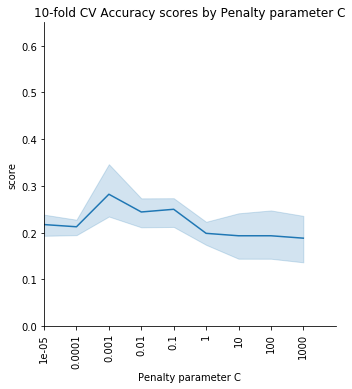

In [474]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC
import pandas as pd

C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000]
results = []
for idx, c in enumerate(C):
    print(idx, "---", c)
    clf=LinearSVC(C=c, loss='squared_hinge', max_iter=100000, multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
    scores = cross_validate(clf,  histogramLabels[0], histogramLabels[1], cv=5)['test_score']
    print(scores)
    for score in scores:
        results.append({'score': score, 'x':idx, 'penalty':c})

df_trace = pd.DataFrame.from_dict(results)
g = sns.relplot(x="x", y="score", kind="line", data=df_trace)
plt.xticks(range(len(C)), C, rotation='vertical')
plt.xlabel("Penalty parameter C")
plt.title("10-fold CV Accuracy scores by Penalty parameter C")
axes = plt.gca()
axes.set_ylim([0.0,0.65])
axes.set_xlim([0,len(C)])
plt.savefig('scaled_amz_C_eval.pdf')
plt.show()

D:\Programme\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anacon

Training Set -- Mean Accuracy 0.5596387407407378
Test Set -- Mean Accuracy 0.08977522477522477
Training Set -- Mean Precision 0.4790330192683133
Test Set -- Mean Precision 0.0629126984126984
Training Set -- Mean Recall 0.515
Test Set -- Mean Recall 0.08361904761904762


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 0.9902589714462404
Test Set -- Mean Accuracy 0.16395770895770895
Training Set -- Mean Precision 0.9932063492063493
Test Set -- Mean Precision 0.10611111111111111
Training Set -- Mean Recall 0.9894444444444443
Test Set -- Mean Recall 0.16066666666666668


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.19575466200466202
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.14197288535219568
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.19237842617152962


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.29658300033300034
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.21984350132625993
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.28845269672855883


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.29074259074259073
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.21209961685823756
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.28706896551724137


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.28401640026640024
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.21372796934865898
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.2770242656449553


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.2825445387945388
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.20920542292956085
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.2784526967285588


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.2849687812187812
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.21333716475095782
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.281632183908046


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.2844925907425907
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.2125134099616858
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.28373563218390807


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.2778259240759241
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.2072911877394636
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.2770689655172414


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.2778259240759241
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.20817359269083405
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.2725817860300619


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.2778259240759241
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.2101800766283525
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.27473563218390806


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


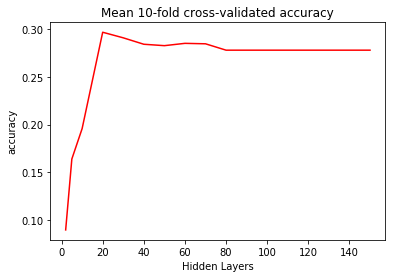

In [475]:
layers = [2,5,10,20,30,40,50,60,70,80,100,150]
results = []
for l in layers:
    clf = MLPClassifier(solver='lbfgs', alpha=1,hidden_layer_sizes=(l,), random_state=1)
    scoring = {'acc': 'accuracy','prec': 'precision_macro','rec': 'recall_macro'}
    scores = cross_validate(clf, histogramLabels[0], histogramLabels[1], cv=5, scoring=scoring,return_train_score=True)
    print("Training Set --", "Mean Accuracy", scores['train_acc'].mean())
    print("Test Set --", "Mean Accuracy", scores['test_acc'].mean())
    print("Training Set --", "Mean Precision", scores['train_prec'].mean())
    print("Test Set --", "Mean Precision", scores['test_prec'].mean())
    print("Training Set --", "Mean Recall", scores['train_rec'].mean())
    print("Test Set --", "Mean Recall", scores['test_rec'].mean())
    results.append(scores['test_acc'].mean())

plt.plot(layers, results, "r", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Hidden Layers")
plt.title("Mean 10-fold cross-validated accuracy")
plt.show()

D:\Programme\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anacon

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.22683025308025312
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.1646111111111111
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.22000000000000003


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.2204591242091242
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.15562452107279692
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.21471264367816092


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.24487512487512486
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.18865900383141762
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.2424827586206897


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.2793643856143856
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.20447318007662835
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.2770689655172414


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.2778259240759241
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.20817359269083405
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.2725817860300619


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 0.8764188787978451
Test Set -- Mean Accuracy 0.24159215784215782
Training Set -- Mean Precision 0.922042328042328
Test Set -- Mean Precision 0.16671882086167802
Training Set -- Mean Recall 0.8595555555555554
Test Set -- Mean Recall 0.2404761904761905


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\cla

Training Set -- Mean Accuracy 0.04940848648117948
Test Set -- Mean Accuracy 0.05516441891441892
Training Set -- Mean Precision 0.005427475340028585
Test Set -- Mean Precision 0.0060434109541252405
Training Set -- Mean Recall 0.035777777777777776
Test Set -- Mean Recall 0.05199134199134199


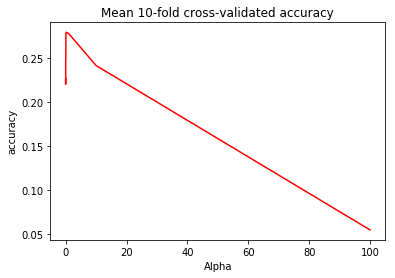

In [476]:
alphas = [0.0001,0.001,0.01,0.1,1,10,100]
results = []
for a in alphas:
    clf = MLPClassifier(solver='lbfgs', alpha=a,hidden_layer_sizes=(100,), random_state=1)
    scoring = {'acc': 'accuracy','prec': 'precision_macro','rec': 'recall_macro'}
    scores = cross_validate(clf, histogramLabels[0], histogramLabels[1], cv=5, scoring=scoring,return_train_score=True)
    print("Training Set --", "Mean Accuracy", scores['train_acc'].mean())
    print("Test Set --", "Mean Accuracy", scores['test_acc'].mean())
    print("Training Set --", "Mean Precision", scores['train_prec'].mean())
    print("Test Set --", "Mean Precision", scores['test_prec'].mean())
    print("Training Set --", "Mean Recall", scores['train_rec'].mean())
    print("Test Set --", "Mean Recall", scores['test_rec'].mean())
    results.append(scores['test_acc'].mean())

plt.plot(alphas, results, "r", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Alpha")
plt.title("Mean 10-fold cross-validated accuracy")
plt.show()

In [477]:
ret=fruits.testModel()
print(ret)

D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


processing  blackberries
processing  tomatoes
processing  grapes
processing  strawberries
processing  apricots
processing  watermelons


D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float6

processing  lemons
processing  pineapples


D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


processing  cherries
processing  kiwifruit
processing  olives
processing  peaches
processing  mangos


D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float6

processing  cantaloupes
processing  guava


D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


processing  avocados
processing  figs


D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


processing  coconuts
processing  apples
processing  raspberries


D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float6

processing  oranges
processing  plums
processing  pears
processing  limes
processing  blueberries
processing  pomegranates
processing  grapefruits
processing  bananas
processing  acerolas
processing  passionfruit
PREDICTED:  [5, 26, 28, 22, 25, 15, 22, 15, 29, 11, 13, 24, 5, 13, 9, 6, 20, 10, 24, 22, 10, 3, 26, 9, 28, 1, 5, 26, 11, 26, 8, 11, 6, 0, 11, 7, 1, 20]
ACTUAL:  [5, 28, 28, 12, 12, 27, 27, 2, 29, 15, 23, 8, 8, 14, 14, 18, 21, 17, 7, 13, 13, 3, 10, 9, 1, 1, 26, 26, 19, 24, 22, 16, 6, 25, 11, 4, 0, 20]
[0.17777777777777776, 0.2631578947368421, 0.20777777777777776]


D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float6

In [478]:
l=next(os.walk("../../ex3/fruits_small/"))[1]
label_count=0
testdict={}
for word in l:
    testdict[word]=label_count
    label_count=label_count+1
testdict

{'acerolas': 0,
 'apples': 1,
 'apricots': 2,
 'avocados': 3,
 'bananas': 4,
 'blackberries': 5,
 'blueberries': 6,
 'cantaloupes': 7,
 'cherries': 8,
 'coconuts': 9,
 'figs': 10,
 'grapefruits': 11,
 'grapes': 12,
 'guava': 13,
 'kiwifruit': 14,
 'lemons': 15,
 'limes': 16,
 'mangos': 17,
 'olives': 18,
 'oranges': 19,
 'passionfruit': 20,
 'peaches': 21,
 'pears': 22,
 'pineapples': 23,
 'plums': 24,
 'pomegranates': 25,
 'raspberries': 26,
 'strawberries': 27,
 'tomatoes': 28,
 'watermelons': 29}

### Cars

In [479]:
#bov = BOV(no_clusters=100)
#bov.start("images\\train\\", "images\\test\\")
#bov.start("../../../ex3/CarData/TrainImages/", "../../../ex3/CarData/TestImages/")
#bov.start("../../../ex3/FIDS30/train/", "../../../ex3/FIDS30/test/")